In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder
from pycaret.regression import *
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,posted_by,under_construction,rera,bhk_no,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


<AxesSubplot:>

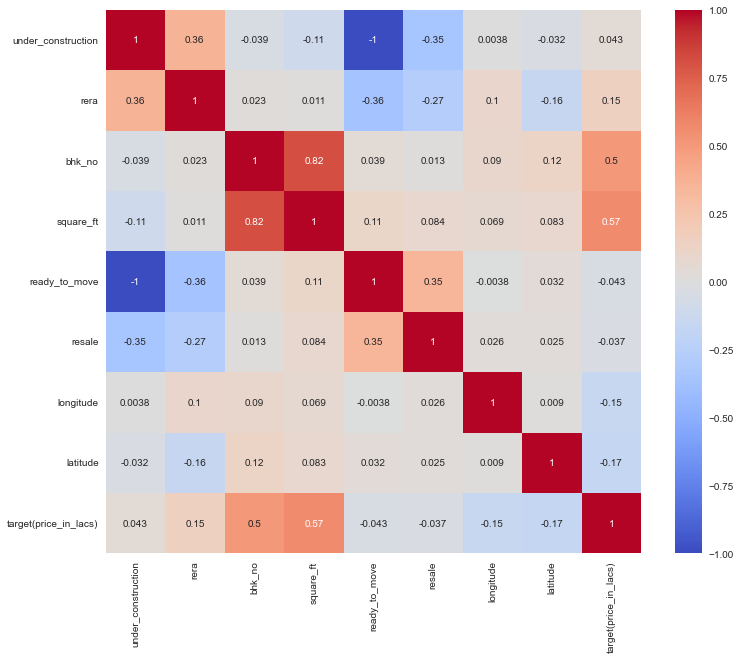

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(method='spearman'), annot=True, cmap='coolwarm')

In [5]:
train_df['city'] = train_df['address'].str.split(',').apply(lambda x: x[-1])

In [6]:
tier_1 = ["Ahmedabad", "Bangalore", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune", "Goa","Maharashtra"]
tier_2 = ["Agra", "Ajmer", "Aligarh", "Amravati", "Amritsar", "Asansol", "Aurangabad", "Bareilly", "Belgaum", "Bhavnagar", "Bhiwandi", "Bhopal", "Bhubaneswar","Bikaner", "Bilaspur", "Bokaro Steel City","Chandigarh", "Coimbatore", "Cuttack"," Dehradun","Dhanbad", "Bhilai","Durgapur", "Erode", "Faridabad", "Firozabad", "Ghaziabad","Gorakhpur", "Gulbarga", "Guntur", "Gwalior", "Gurugram", "Guwahati", "Hamirpur", "Hubli–Dharwad", "Indore", "Jabalpur", "Jaipur", "Jalandhar", "Jalgaon", "Jammu", "Jamnagar", "Jamshedpur", "Jhansi", "Jodhpur","Navi Mumbai" ,"Kakinada", "Kannur"," Kanpur", "Karnal", "Kochi"," Kolhapur", "Kollam", "Kozhikode", "Kurnool", "Ludhiana","Lucknow","Madurai", "Malappuram"," Mathura", "Mangalore", "Meerut", "Moradabad", "Mysore", "Nagpur"," Nanded"," Nashik", "Nellore","Navi Mumbai","Noid", "Patna", "Puducherry", "Purulia", "Prayagraj", "Raipur","Rajkot", "Rajamahendravaram"," Ranchi", "Rourkela", "Ratlam", "Salem", "Sangli", "Shimla", "Siliguri"," Solapur", "Srinagar", "Surat", "Thanjavur", "Thiruvananthapuram", "Thrissur", "Tiruchirappalli", "Tirunelveli", "Tiruvannamalai", "Ujjain", "Vijayapura", "Vadodara", "Varanasi", "Vasai-Virar City", "Vijayawada", "Visakhapatnam", "Vellore", "Warangal"]

def mapping_city(city):

    if city in tier_1:
        return 0

    elif city in tier_2:
        return 1
        
    else:
        return 2

train_df['city_tier'] = train_df['city'].apply(mapping_city)


In [7]:
train_df

,posted_by,under_construction,rera,bhk_no,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs),city,city_tier
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,1
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,1
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra,1
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi,2
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,0


In [8]:
train_df['price_per_sqft'] = train_df['target(price_in_lacs)']*100000/train_df['square_ft']

In [9]:
train_df

,posted_by,under_construction,rera,bhk_no,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,target(price_in_lacs),city,city_tier,price_per_sqft
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,0,4229.999999
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,1,4000.000000
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,0,4608.000000
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,1,6721.000000
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,0,6056.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra,1,1800.000000
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi,2,2080.000000
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,1,2650.000001
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,0,7227.000000


In [10]:
train_df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,target(price_in_lacs),city_tier,price_per_sqft
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746,0.837527,7503.938338
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713,0.834925,10847.976910
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,1.000000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000,0.000000,3551.500001
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000,1.000000,5095.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000,2.000000,8055.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000,2.000000,900000.000000


In [11]:
for column in train_df.columns:
    print(train_df[column].value_counts())
    print("*"*40)

Dealer     18291
Owner      10538
Builder      622
Name: posted_by, dtype: int64
****************************************
0    24157
1     5294
Name: under_construction, dtype: int64
****************************************
0    20088
1     9363
Name: rera, dtype: int64
****************************************
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: bhk_no, dtype: int64
****************************************
BHK    29427
RK        24
Name: bhk_or_rk, dtype: int64
****************************************
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1685.097420      1
1085.176085      1
1300.142248      1
911.002102       1
896.774194       1
Name: square_ft, Length: 19561, dtype: int64
****************************************
1    24157
0     5294
Name: ready_to

<AxesSubplot:>

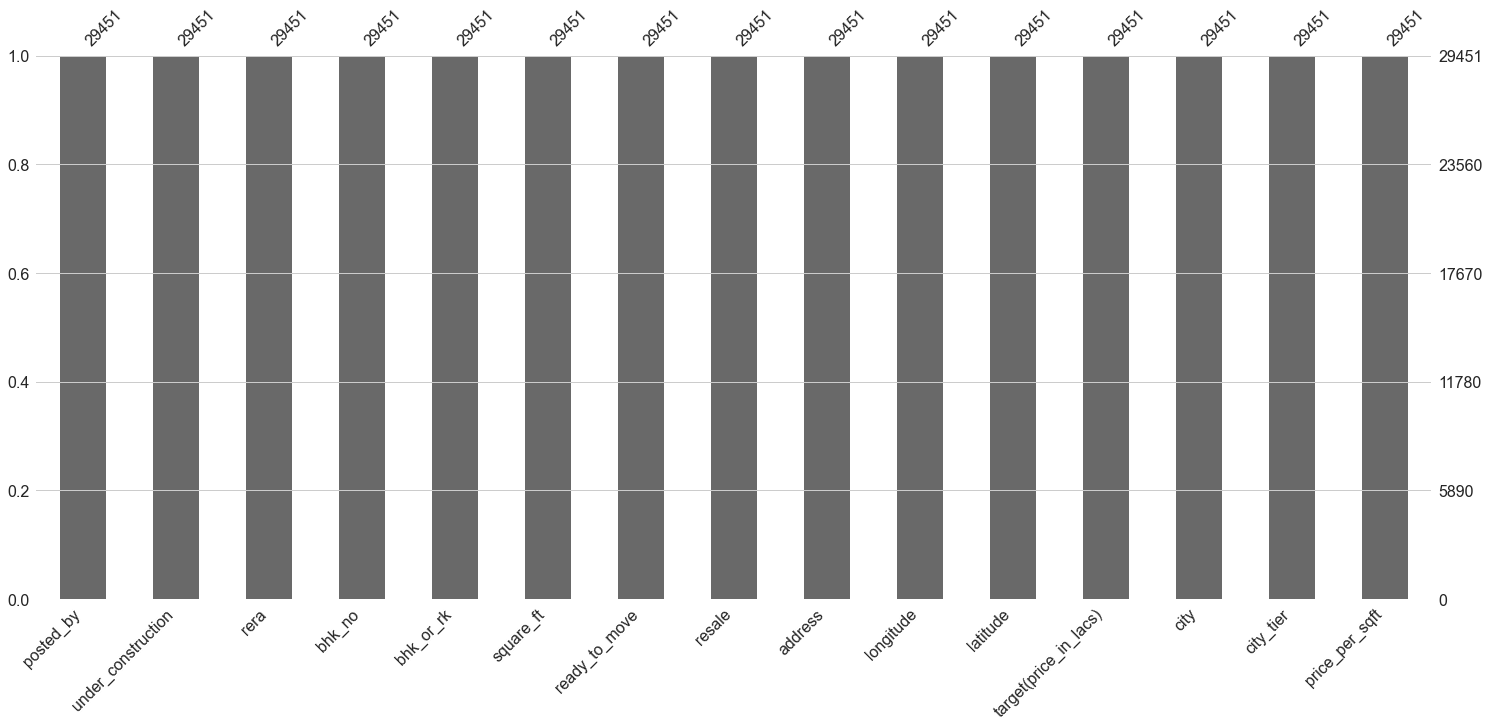

In [12]:
msno.bar(train_df)

In [13]:
train_df.isna().sum()

posted_by                0
under_construction       0
rera                     0
bhk_no                   0
bhk_or_rk                0
square_ft                0
ready_to_move            0
resale                   0
address                  0
longitude                0
latitude                 0
target(price_in_lacs)    0
city                     0
city_tier                0
price_per_sqft           0
dtype: int64

<AxesSubplot:xlabel='target(price_in_lacs)', ylabel='Count'>

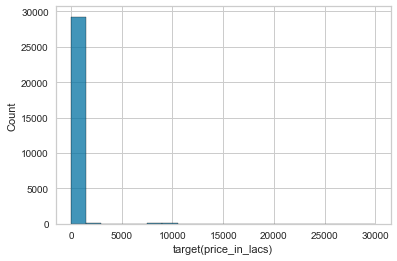

In [14]:
sns.histplot(train_df['target(price_in_lacs)'], bins=20)

<AxesSubplot:xlabel='price_in_lacs', ylabel='Count'>

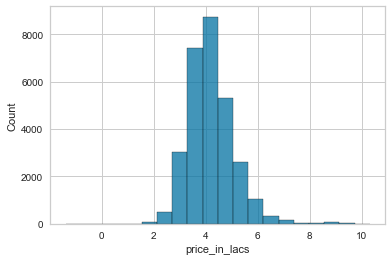

In [15]:
train_df['price_in_lacs'] = np.log(train_df['target(price_in_lacs)'])
sns.histplot(train_df['price_in_lacs'], bins=20)

<AxesSubplot:xlabel='square_ft', ylabel='Count'>

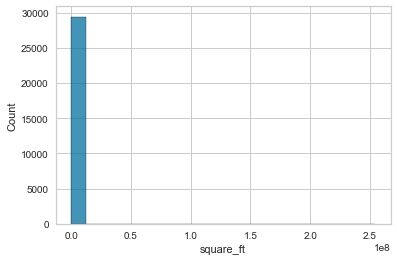

In [16]:
sns.histplot(train_df['square_ft'], bins=20)

<AxesSubplot:xlabel='area', ylabel='Count'>

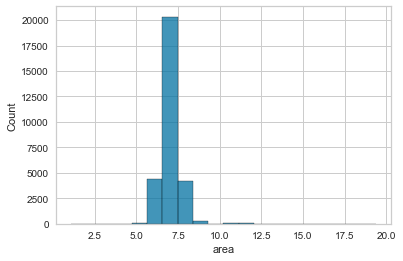

In [17]:
train_df['area'] = np.log(train_df['square_ft'])
sns.histplot(train_df['area'], bins=20)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

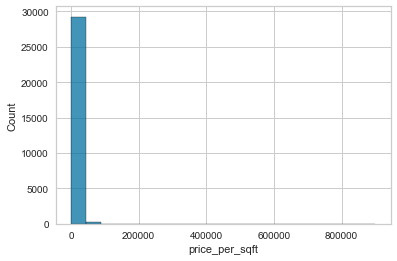

In [18]:
sns.histplot(train_df['price_per_sqft'], bins=20)

<AxesSubplot:xlabel='pp_sqft', ylabel='Count'>

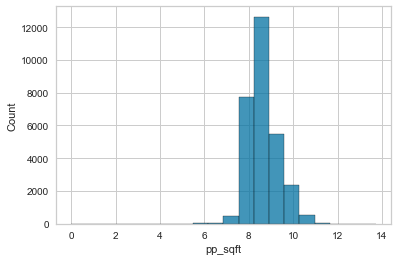

In [19]:
train_df['pp_sqft'] = np.log(train_df['price_per_sqft'])
sns.histplot(train_df['pp_sqft'], bins=20)

In [20]:
# sns.histplot(train_df['latitude'], bins=20)

In [21]:
# train_df['lat'] = np.log(train_df['latitude'])
# sns.histplot(train_df['area'], bins=20)

In [22]:
# sns.histplot(train_df['longitude'], bins=20)

In [23]:
# train_df['longi'] = np.log(train_df['longitude'])
# sns.histplot(train_df['area'], bins=20)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posted_by              29451 non-null  object 
 1   under_construction     29451 non-null  int64  
 2   rera                   29451 non-null  int64  
 3   bhk_no                 29451 non-null  int64  
 4   bhk_or_rk              29451 non-null  object 
 5   square_ft              29451 non-null  float64
 6   ready_to_move          29451 non-null  int64  
 7   resale                 29451 non-null  int64  
 8   address                29451 non-null  object 
 9   longitude              29451 non-null  float64
 10  latitude               29451 non-null  float64
 11  target(price_in_lacs)  29451 non-null  float64
 12  city                   29451 non-null  object 
 13  city_tier              29451 non-null  int64  
 14  price_per_sqft         29451 non-null  float64
 15  pr

In [25]:
train_df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,target(price_in_lacs),city_tier,price_per_sqft,price_in_lacs,area,pp_sqft
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746,0.837527,7503.938338,4.210367,7.086932,8.636360
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713,0.834925,10847.976910,0.899434,0.593580,0.696564
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,1.000000,-1.386294,1.098612,0.000000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000,0.000000,3551.500001,3.637586,6.802418,8.175125
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000,1.000000,5095.000000,4.127134,7.069072,8.536015
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000,2.000000,8055.000000,4.605170,7.346454,8.994048
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000,2.000000,900000.000000,10.308953,19.354990,13.710150


In [26]:
def get_outliers(df, column_name):

    IQR = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    lower_sq_limit = df[column_name].quantile(0.25) - (IQR * 1.0)
    upper_sq_limit = df[column_name].quantile(0.75) + (IQR * 1.0)
    outliers = np.where(df[column_name] > upper_sq_limit, True,
                        np.where(df[column_name] < lower_sq_limit, True, False))
    return outliers

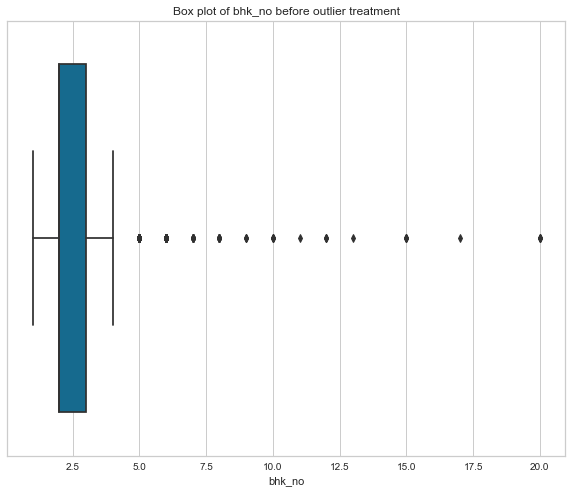

(29451, 18) (29167, 18)
284 rows was been deleted


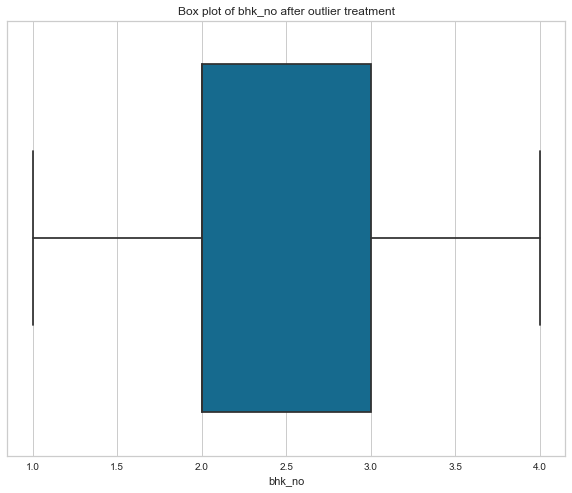

In [27]:
plt.figure(figsize=(10, 8))
sns.boxplot(train_df['bhk_no'])
plt.title("Box plot of bhk_no before outlier treatment")
plt.show()

bhk_no_outliers = get_outliers(train_df, 'bhk_no')
df_without_bhkno_outliers = train_df.loc[~(bhk_no_outliers), ]
print(train_df.shape, df_without_bhkno_outliers.shape)

print("{} rows was been deleted".format(train_df.shape[0] - df_without_bhkno_outliers.shape[0]))

train_df = df_without_bhkno_outliers

plt.figure(figsize=(10, 8))
sns.boxplot(train_df['bhk_no'])
plt.title("Box plot of bhk_no after outlier treatment")
plt.show()

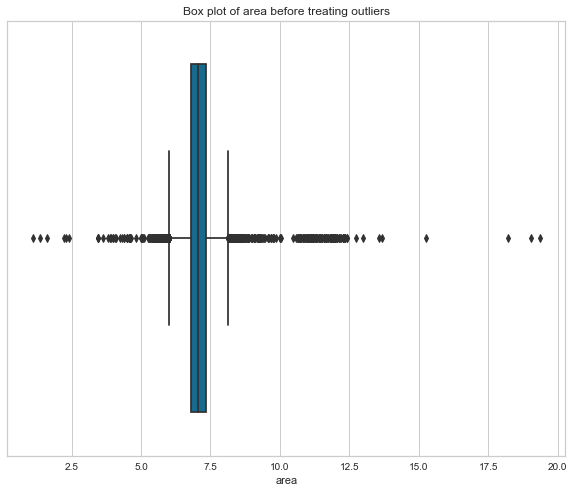

(29167, 18) (26684, 18)
2483 rows was been deleted


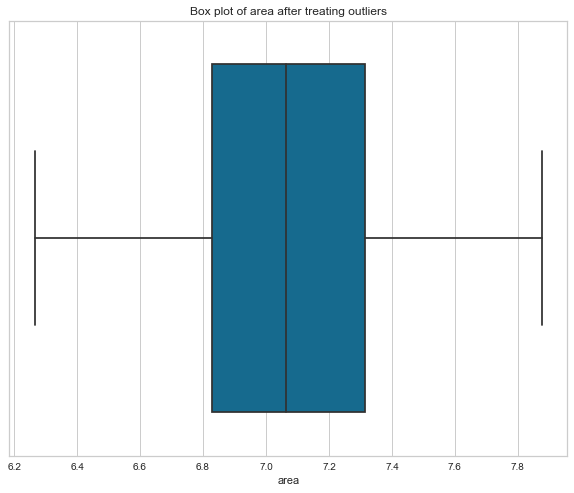

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(train_df['area'])
plt.title("Box plot of area before treating outliers")
plt.show()

area_outliers = get_outliers(train_df, 'area')
df_without_sqft_outliers = train_df.loc[~(area_outliers), ]
print(train_df.shape, df_without_sqft_outliers.shape)

print("{} rows was been deleted".format(train_df.shape[0] - df_without_sqft_outliers.shape[0]))

train_df = df_without_sqft_outliers

plt.figure(figsize=(10, 8))
sns.boxplot(train_df['area'])
plt.title("Box plot of area after treating outliers")
plt.show()


In [29]:
# map = folium.Map(location=[22.00,78.00], tiles='cartodbpositron', zoom_start=6)


# for i in range(0,len(train_df)):
#     Circle(
#         location=[train_df.iloc[i]['longitude'], train_df.iloc[i]['latitude']],
#         radius=100,
#         color='blue').add_to(map)

# # Display the map
# map

In [30]:
# indexNames=train_df[(train_df['longitude'] <= 68)|(train_df['longitude']>=98)|(train_df['latitude']<=8)|(train_df['latitude']>=37)].index
# train_df.drop(indexNames,inplace=True)



Latitude outliers/graphs

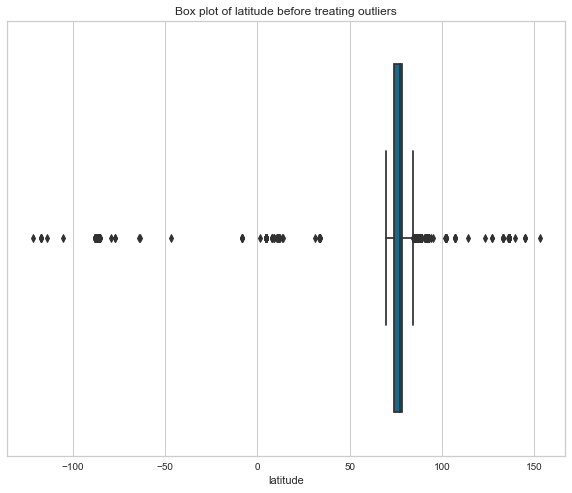

(26684, 18) (23642, 18)
3042 rows was been deleted


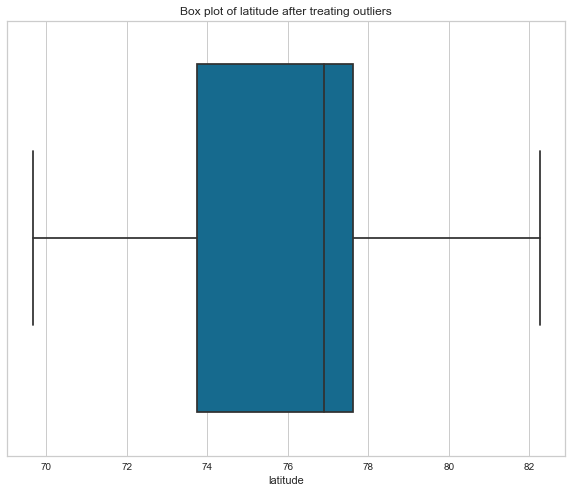

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(train_df['latitude'])
plt.title("Box plot of latitude before treating outliers")
plt.show()

lati_outliers = get_outliers(train_df, 'latitude')
df_without_lati_outliers = train_df.loc[~(lati_outliers), ]
print(train_df.shape, df_without_lati_outliers.shape)

print("{} rows was been deleted".format(
    train_df.shape[0] - df_without_lati_outliers.shape[0]))

train_df = df_without_lati_outliers

plt.figure(figsize=(10, 8))
sns.boxplot(train_df['latitude'])
plt.title("Box plot of latitude after treating outliers")
plt.show()


In [32]:
# map = folium.Map(location=[22.00,78.00], tiles='cartodbpositron', zoom_start=6)


# for i in range(0,len(train_df)):
#     Circle(
#         location=[train_df.iloc[i]['longitude'], train_df.iloc[i]['latitude']],
#         radius=100,
#         color='blue').add_to(map)

# # Display the map
# map

Longitude graphs/outlier ==0

In [33]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(train_df['longitude'])
# plt.title("Box plot of longitude before treating outliers")
# plt.show()

# longi_outliers = get_outliers(train_df, 'longitude')
# df_without_longi_outliers = train_df.loc[~(longi_outliers), ]
# print(train_df.shape, df_without_longi_outliers.shape)

# print("{} rows was been deleted".format(
#     train_df.shape[0] - df_without_longi_outliers.shape[0]))

# train_df = df_without_longi_outliers

# plt.figure(figsize=(10, 8))
# sns.boxplot(train_df['longitude'])
# plt.title("Box plot of longitude after treating outliers")
# plt.show()


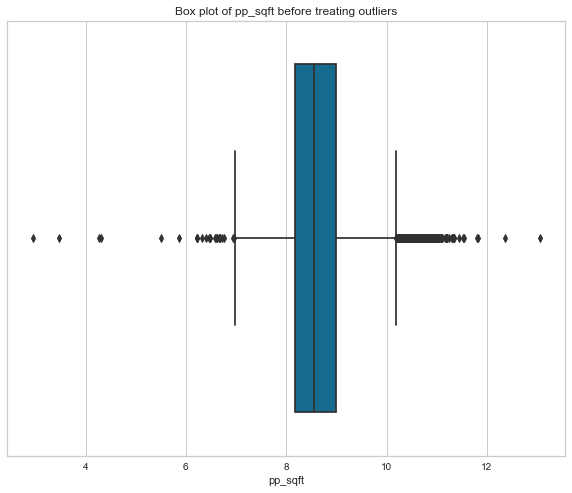

(23642, 18) (21918, 18)
1724 rows was been deleted


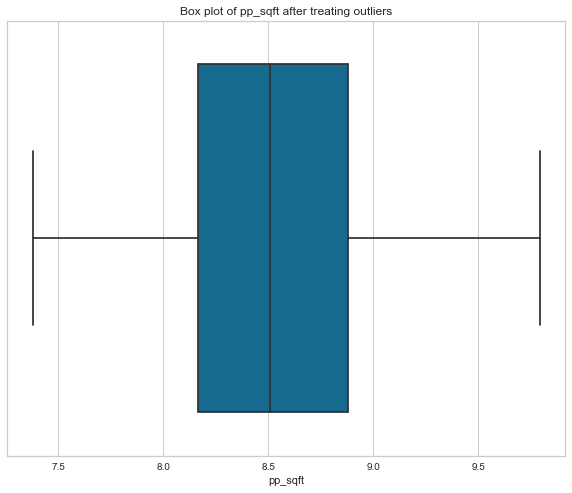

In [34]:
plt.figure(figsize=(10, 8))
sns.boxplot(train_df['pp_sqft'])
plt.title("Box plot of pp_sqft before treating outliers")
plt.show()

pp_sqft_outliers = get_outliers(train_df, 'pp_sqft')
df_without_pp_sqft_outliers = train_df.loc[~(pp_sqft_outliers), ]
print(train_df.shape, df_without_pp_sqft_outliers.shape)

print("{} rows was been deleted".format(
    train_df.shape[0] - df_without_pp_sqft_outliers.shape[0]))

train_df = df_without_pp_sqft_outliers

plt.figure(figsize=(10, 8))
sns.boxplot(train_df['pp_sqft'])
plt.title("Box plot of pp_sqft after treating outliers")
plt.show()


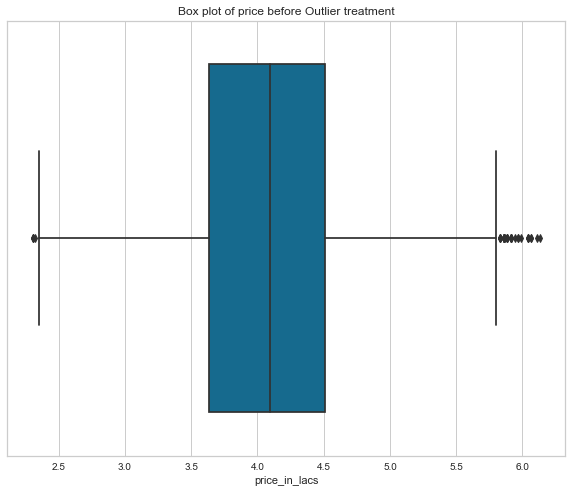

(21918, 18) (21035, 18)
883 rows was been deleted


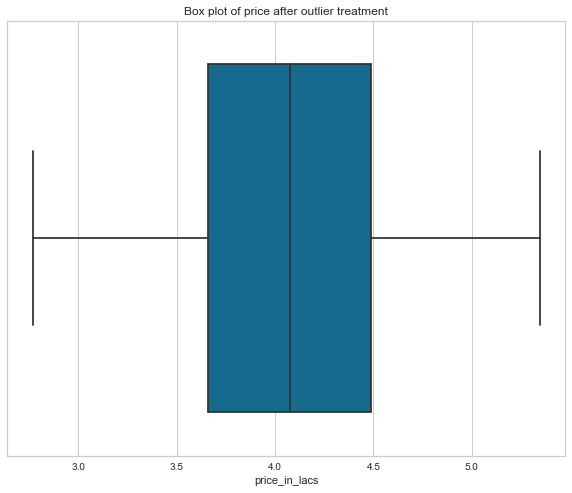

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(train_df['price_in_lacs'])
plt.title("Box plot of price before Outlier treatment")
plt.show()


price_outliers = get_outliers(train_df, 'price_in_lacs')
df_without_price_outliers = train_df.loc[~(price_outliers), ]
print(train_df.shape, df_without_price_outliers.shape)

print("{} rows was been deleted".format(
    train_df.shape[0] - df_without_price_outliers.shape[0]))

train_df = df_without_price_outliers


plt.figure(figsize=(10, 8))
sns.boxplot(train_df['price_in_lacs'])
plt.title("Box plot of price after outlier treatment")
plt.show()


In [36]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(train_df['target(price_in_lacs)'])
# plt.title("Box plot of price before Outlier treatment")
# plt.show()


# price_outliers = get_outliers(train_df, 'target(price_in_lacs)')
# df_without_price_outliers = train_df.loc[~(price_outliers), ]
# print(train_df.shape, df_without_price_outliers.shape)

# print("{} rows was been deleted".format(
#     train_df.shape[0] - df_without_price_outliers.shape[0]))

# train_df = df_without_price_outliers


# plt.figure(figsize=(10, 8))
# sns.boxplot(train_df['target(price_in_lacs)'])
# plt.title("Box plot of price after outlier treatment")
# plt.show()


In [37]:
train_df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,target(price_in_lacs),city_tier,price_per_sqft,price_in_lacs,area,pp_sqft
count,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000,21035.000000
mean,0.159971,0.333539,2.321464,1231.600173,0.840029,0.946470,21.030121,76.376707,69.006913,0.863894,5731.162158,4.072579,7.056844,8.528660
std,0.366588,0.471489,0.689723,425.304763,0.366588,0.225093,6.387667,2.315887,40.381797,0.825088,3114.956219,0.573145,0.347265,0.489322
min,0.000000,0.000000,1.000000,526.024363,0.000000,0.000000,8.723600,69.658066,15.900000,0.000000,1599.000000,2.766319,6.265348,7.377134
25%,0.000000,0.000000,2.000000,942.779738,1.000000,1.000000,13.119500,73.890009,38.900000,0.000000,3529.500000,3.660994,6.848833,8.168911
50%,0.000000,0.000000,2.000000,1170.046802,1.000000,1.000000,19.360714,77.084300,59.000000,1.000000,4900.000001,4.077537,7.064799,8.496990
75%,0.000000,1.000000,3.000000,1494.091550,1.000000,1.000000,28.252954,77.628291,89.000000,2.000000,6970.999999,4.488636,7.309274,8.849514
max,1.000000,1.000000,4.000000,2635.277583,1.000000,1.000000,34.091110,82.262447,210.000000,2.000000,17900.000000,5.347108,7.876744,9.792556


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21035 entries, 0 to 29450
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posted_by              21035 non-null  object 
 1   under_construction     21035 non-null  int64  
 2   rera                   21035 non-null  int64  
 3   bhk_no                 21035 non-null  int64  
 4   bhk_or_rk              21035 non-null  object 
 5   square_ft              21035 non-null  float64
 6   ready_to_move          21035 non-null  int64  
 7   resale                 21035 non-null  int64  
 8   address                21035 non-null  object 
 9   longitude              21035 non-null  float64
 10  latitude               21035 non-null  float64
 11  target(price_in_lacs)  21035 non-null  float64
 12  city                   21035 non-null  object 
 13  city_tier              21035 non-null  int64  
 14  price_per_sqft         21035 non-null  float64
 15  pr

In [39]:
def label_encoder(new_df, column_name):
    label_encoder = LabelEncoder()

    new_df[column_name] = label_encoder.fit_transform(new_df[column_name])
    print(column_name)
    for i in range(len(new_df[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(new_df[column_name].value_counts())
    print('-'*10)

    return new_df[column_name], label_encoder


In [40]:
train_df['posted_by'], label_encoder_posted_by = label_encoder(train_df, 'posted_by')
train_df['bhk_or_rk'], label_encoder_bhk_or_rk = label_encoder(train_df, 'bhk_or_rk')
train_df['city'], label_encoder_city = label_encoder(train_df, 'city')

posted_by
For 0 : ['Builder']
For 1 : ['Dealer']
For 2 : ['Owner']
----------
1    12516
2     8093
0      426
Name: posted_by, dtype: int64
----------
bhk_or_rk
For 0 : ['BHK']
----------
0    21035
Name: bhk_or_rk, dtype: int64
----------
city
For 0 : ['Agra']
For 1 : ['Ahmednagar']
For 2 : ['Ajmer']
For 3 : ['Akola']
For 4 : ['Aligarh']
For 5 : ['Allahabad']
For 6 : ['Alwar']
For 7 : ['Ambala']
For 8 : ['Amravati']
For 9 : ['Amritsar']
For 10 : ['Amroha']
For 11 : ['Anand']
For 12 : ['Anantapur']
For 13 : ['Asansol']
For 14 : ['Aurangabad']
For 15 : ['Baddi']
For 16 : ['Bahadurgarh']
For 17 : ['Bangalore']
For 18 : ['Banswara']
For 19 : ['Bareilly']
For 20 : ['Belgaum']
For 21 : ['Betul']
For 22 : ['Bhagalpur']
For 23 : ['Bhandara']
For 24 : ['Bharatpur']
For 25 : ['Bharuch']
For 26 : ['Bhavnagar']
For 27 : ['Bhilai']
For 28 : ['Bhimavaram']
For 29 : ['Bhiwadi']
For 30 : ['Bhiwani']
For 31 : ['Bhopal']
For 32 : ['Bhubaneswar']
For 33 : ['Bikaner']
For 34 : ['Bilaspur']
For 35 : ['Ch

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21035 entries, 0 to 29450
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posted_by              21035 non-null  int32  
 1   under_construction     21035 non-null  int64  
 2   rera                   21035 non-null  int64  
 3   bhk_no                 21035 non-null  int64  
 4   bhk_or_rk              21035 non-null  int32  
 5   square_ft              21035 non-null  float64
 6   ready_to_move          21035 non-null  int64  
 7   resale                 21035 non-null  int64  
 8   address                21035 non-null  object 
 9   longitude              21035 non-null  float64
 10  latitude               21035 non-null  float64
 11  target(price_in_lacs)  21035 non-null  float64
 12  city                   21035 non-null  int32  
 13  city_tier              21035 non-null  int64  
 14  price_per_sqft         21035 non-null  float64
 15  pr

In [42]:
train_df.isna().sum()

posted_by                0
under_construction       0
rera                     0
bhk_no                   0
bhk_or_rk                0
square_ft                0
ready_to_move            0
resale                   0
address                  0
longitude                0
latitude                 0
target(price_in_lacs)    0
city                     0
city_tier                0
price_per_sqft           0
price_in_lacs            0
area                     0
pp_sqft                  0
dtype: int64

In [43]:
train_df.drop(['address','square_ft', 'target(price_in_lacs)', 'price_per_sqft'], axis=1, inplace=True)

In [44]:
X = train_df.loc[:, train_df.columns != 'price_in_lacs']
y = train_df['price_in_lacs']

In [45]:
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from sklearn.ensemble import ExtraTreesRegressor

# model1 = XGBRegressor()
# model2 = ExtraTreesRegressor()
# model3 = LGBMRegressor()
# model4 = CatBoostRegressor()

# model1.fit(X,y)
# print(model1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
# feat_importances.nlargest(100).plot(kind='barh')
# plt.show()
# print("*"*30)

# model2.fit(X,y)
# print(model2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
# feat_importances.nlargest(100).plot(kind='barh')
# plt.show()
# print("*"*30)

# model3.fit(X,y)
# print(model3.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model3.feature_importances_, index=X.columns)
# feat_importances.nlargest(100).plot(kind='barh')
# plt.show()
# print('*'*30)

# model4.fit(X,y)
# print(model4.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model4.feature_importances_, index=X.columns)
# feat_importances.nlargest(100).plot(kind='barh')
# plt.show()

In [46]:
exp_reg = setup(train_df, target='price_in_lacs', numeric_features=['pp_sqft'], categorical_features=[
                'posted_by', 'rera', 'bhk_no', 'resale', 'under_construction', 'city'], ignore_features=['ready_to_move', 'bhk_or_rk', 'area', 'latitude', 'longitude','city_tier'])


,Description,Value
0,session_id,8290
1,Target,price_in_lacs
2,Original Data,"(21035, 14)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14724, 204)"


In [47]:
specific_models = compare_models(include = ['xgboost','catboost','lightgbm','rf','gbr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1313,0.0306,0.1747,0.9074,0.0353,0.0331,1.4930
lightgbm,Light Gradient Boosting Machine,0.1326,0.0309,0.1758,0.9063,0.0355,0.0334,0.1500
xgboost,Extreme Gradient Boosting,0.1331,0.0316,0.1776,0.9043,0.0359,0.0336,2.4390
gbr,Gradient Boosting Regressor,0.1417,0.0346,0.1859,0.8952,0.0375,0.0358,1.1870
rf,Random Forest Regressor,0.1396,0.0358,0.1891,0.8915,0.0381,0.0351,1.9450


In [48]:
print("gg")''''''

SyntaxError: invalid syntax (Temp/ipykernel_2324/964989747.py, line 1)

In [49]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1347,0.0320,0.1790,0.9034,0.0361,0.0340
1,0.1388,0.0350,0.1872,0.8954,0.0379,0.0350
2,0.1356,0.0317,0.1782,0.9018,0.0358,0.0340
3,0.1225,0.0265,0.1627,0.9195,0.0327,0.0307
4,0.1278,0.0289,0.1699,0.9101,0.0346,0.0324
5,0.1292,0.0293,0.1711,0.9148,0.0345,0.0326
6,0.1352,0.0319,0.1787,0.9042,0.0361,0.0343
7,0.1303,0.0306,0.1748,0.9058,0.0351,0.0326
8,0.1318,0.0309,0.1757,0.9080,0.0355,0.0332
9,0.1276,0.0289,0.1699,0.9109,0.0345,0.0324


In [50]:
xgbr = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1359,0.0330,0.1817,0.9004,0.0367,0.0343
1,0.1388,0.0355,0.1885,0.8939,0.0382,0.0349
2,0.1364,0.0325,0.1802,0.8996,0.0362,0.0342
3,0.1253,0.0280,0.1674,0.9148,0.0337,0.0315
4,0.1290,0.0296,0.1719,0.9080,0.0351,0.0327
5,0.1326,0.0303,0.1740,0.9118,0.0352,0.0335
6,0.1388,0.0343,0.1851,0.8972,0.0374,0.0352
7,0.1312,0.0306,0.1749,0.9057,0.0350,0.0328
8,0.1336,0.0319,0.1786,0.9049,0.0362,0.0337
9,0.1298,0.0302,0.1739,0.9067,0.0353,0.0329


In [51]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1345,0.0325,0.1804,0.9019,0.0363,0.0339
1,0.1404,0.0355,0.1883,0.8941,0.0381,0.0354
2,0.1365,0.0324,0.1799,0.8999,0.0362,0.0342
3,0.1245,0.0271,0.1646,0.9176,0.0331,0.0312
4,0.1288,0.0294,0.1716,0.9084,0.0349,0.0326
5,0.1307,0.0293,0.1712,0.9146,0.0346,0.0330
6,0.1374,0.0331,0.1820,0.9006,0.0368,0.0349
7,0.1315,0.0302,0.1738,0.9069,0.0348,0.0329
8,0.1323,0.0307,0.1753,0.9084,0.0355,0.0334
9,0.1290,0.0291,0.1705,0.9103,0.0347,0.0328


In [52]:
rfr = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1462,0.0398,0.1996,0.8799,0.0403,0.0368
1,0.1445,0.0392,0.1980,0.8830,0.0400,0.0364
2,0.1410,0.0370,0.1923,0.8856,0.0385,0.0352
3,0.1308,0.0315,0.1774,0.9043,0.0356,0.0328
4,0.1371,0.0336,0.1834,0.8953,0.0372,0.0346
5,0.1382,0.0352,0.1876,0.8975,0.0378,0.0349
6,0.1426,0.0379,0.1947,0.8863,0.0390,0.0359
7,0.1378,0.0340,0.1844,0.8951,0.0369,0.0344
8,0.1396,0.0355,0.1884,0.8942,0.0378,0.0350
9,0.1386,0.0343,0.1853,0.8941,0.0377,0.0352


In [53]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1432,0.0357,0.1888,0.8925,0.0381,0.0362
1,0.1459,0.0382,0.1953,0.8861,0.0394,0.0367
2,0.1456,0.0361,0.1901,0.8883,0.0382,0.0365
3,0.1338,0.0307,0.1753,0.9066,0.0353,0.0337
4,0.1404,0.0341,0.1845,0.8940,0.0375,0.0355
5,0.1402,0.0332,0.1823,0.9032,0.0367,0.0354
6,0.1480,0.0372,0.1928,0.8885,0.0390,0.0376
7,0.1400,0.0335,0.1831,0.8966,0.0366,0.0350
8,0.1436,0.0355,0.1883,0.8943,0.0380,0.0362
9,0.1364,0.0318,0.1785,0.9017,0.0362,0.0346


In [54]:
tuned_cat = tune_model(cat,n_iter=400)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1342,0.0321,0.1792,0.9032,0.0361,0.0338
1,0.1380,0.0346,0.1861,0.8966,0.0377,0.0348
2,0.1337,0.0314,0.1773,0.9028,0.0356,0.0335
3,0.1220,0.0264,0.1624,0.9198,0.0326,0.0306
4,0.1259,0.0281,0.1677,0.9125,0.0341,0.0318
5,0.1288,0.0293,0.1711,0.9148,0.0345,0.0325
6,0.1331,0.0310,0.1761,0.9070,0.0356,0.0338
7,0.1292,0.0303,0.1742,0.9065,0.0349,0.0323
8,0.1302,0.0305,0.1746,0.9091,0.0353,0.0328
9,0.1280,0.0292,0.1708,0.9100,0.0347,0.0325


In [55]:
tuned_xgbr = tune_model(xgbr,n_iter=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1352,0.0329,0.1813,0.9009,0.0365,0.0340
1,0.1389,0.0351,0.1874,0.8951,0.0380,0.0350
2,0.1360,0.0324,0.1801,0.8997,0.0361,0.0341
3,0.1241,0.0271,0.1646,0.9176,0.0330,0.0311
4,0.1273,0.0286,0.1693,0.9108,0.0345,0.0322
5,0.1323,0.0301,0.1734,0.9124,0.0350,0.0334
6,0.1376,0.0332,0.1821,0.9005,0.0368,0.0349
7,0.1299,0.0301,0.1735,0.9072,0.0347,0.0325
8,0.1320,0.0313,0.1768,0.9068,0.0357,0.0333
9,0.1288,0.0296,0.1721,0.9086,0.0350,0.0327


In [56]:
tuned_lgbm = tune_model(lgbm,n_iter=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1375,0.0335,0.1830,0.8991,0.0368,0.0347
1,0.1425,0.0371,0.1926,0.8892,0.0390,0.0359
2,0.1386,0.0337,0.1835,0.8958,0.0369,0.0347
3,0.1281,0.0287,0.1694,0.9127,0.0341,0.0322
4,0.1313,0.0306,0.1748,0.9049,0.0356,0.0332
5,0.1338,0.0310,0.1761,0.9097,0.0356,0.0338
6,0.1411,0.0347,0.1862,0.8960,0.0378,0.0359
7,0.1346,0.0310,0.1762,0.9043,0.0353,0.0337
8,0.1352,0.0320,0.1789,0.9046,0.0361,0.0340
9,0.1329,0.0305,0.1747,0.9058,0.0356,0.0338


In [57]:
tuned_gbr = tune_model(gbr,n_iter = 200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1355,0.0332,0.1823,0.8999,0.0367,0.0341
1,0.1392,0.0351,0.1874,0.8951,0.0380,0.0351
2,0.1355,0.0322,0.1794,0.9005,0.0360,0.0339
3,0.1225,0.0267,0.1633,0.9189,0.0328,0.0308
4,0.1265,0.0287,0.1694,0.9107,0.0345,0.0320
5,0.1315,0.0303,0.1740,0.9118,0.0351,0.0332
6,0.1360,0.0330,0.1816,0.9011,0.0366,0.0345
7,0.1319,0.0306,0.1749,0.9057,0.0349,0.0330
8,0.1325,0.0316,0.1777,0.9059,0.0359,0.0334
9,0.1283,0.0292,0.1710,0.9098,0.0347,0.0325


In [58]:
print('kjj')''

SyntaxError: invalid syntax (Temp/ipykernel_2324/1381874433.py, line 1)

In [59]:
blender_specific = blend_models(estimator_list = [cat,tuned_cat,tuned_gbr,lgbm,tuned_xgbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1333,0.0318,0.1784,0.9040,0.0359,0.0336
1,0.1377,0.0344,0.1855,0.8973,0.0376,0.0347
2,0.1340,0.0314,0.1772,0.9029,0.0356,0.0336
3,0.1214,0.0260,0.1614,0.9208,0.0324,0.0304
4,0.1255,0.0281,0.1675,0.9127,0.0341,0.0317
5,0.1291,0.0289,0.1701,0.9158,0.0343,0.0326
6,0.1343,0.0317,0.1781,0.9048,0.0360,0.0341
7,0.1292,0.0296,0.1721,0.9087,0.0344,0.0323
8,0.1305,0.0303,0.1740,0.9097,0.0352,0.0329
9,0.1268,0.0285,0.1688,0.9120,0.0343,0.0322


In [60]:
stacker = stack_models(estimator_list =[cat,tuned_cat,tuned_gbr,lgbm,tuned_xgbr], meta_model = cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1338,0.0321,0.1791,0.9033,0.0361,0.0337
1,0.1382,0.0348,0.1864,0.8962,0.0378,0.0348
2,0.1354,0.0323,0.1798,0.9001,0.0361,0.0339
3,0.1215,0.0264,0.1626,0.9197,0.0326,0.0305
4,0.1264,0.0284,0.1686,0.9115,0.0344,0.0320
5,0.1286,0.0290,0.1702,0.9157,0.0343,0.0325
6,0.1328,0.0312,0.1765,0.9065,0.0356,0.0337
7,0.1301,0.0304,0.1743,0.9063,0.0349,0.0326
8,0.1307,0.0308,0.1756,0.9081,0.0355,0.0329
9,0.1281,0.0294,0.1714,0.9094,0.0349,0.0325


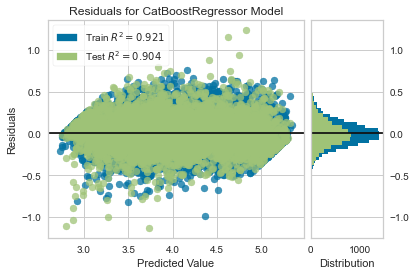

In [61]:
plot_model(cat,'residuals')

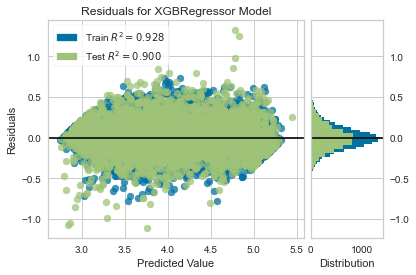

In [62]:
plot_model(xgbr,'residuals')

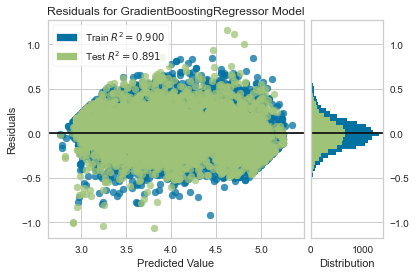

In [63]:
plot_model(gbr,'residuals')

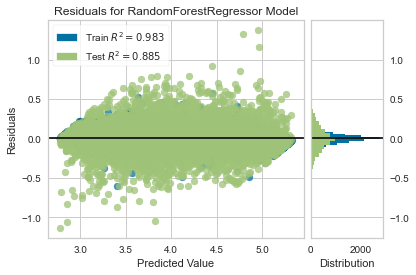

In [64]:
plot_model(rfr,'residuals')

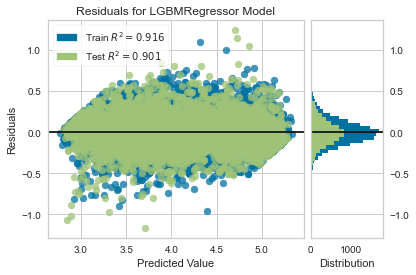

In [65]:
plot_model(lgbm,'residuals')

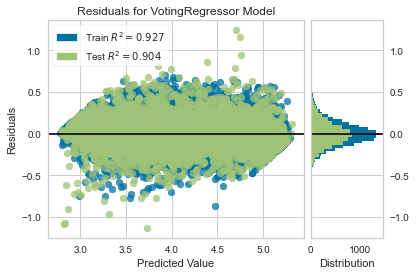

In [66]:
plot_model(blender_specific,'residuals')

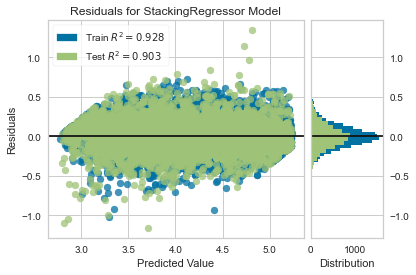

In [67]:
plot_model(stacker,'residuals')

In [68]:
print("gghh")''''''

SyntaxError: invalid syntax (Temp/ipykernel_2324/88762190.py, line 1)

In [69]:
pred_holdout = np.exp(predict_model(blender_specific))
pred_holdout

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1297,0.0310,0.1761,0.9043,0.0358,0.0328


,pp_sqft,posted_by_0,posted_by_1,posted_by_2,under_construction_0,rera_1,bhk_no_1,bhk_no_2,bhk_no_3,bhk_no_4,...,city_92,city_93,city_94,city_95,city_96,city_97,city_98,city_99,price_in_lacs,Label
0,14707.996094,1.000000,2.718282,1.000000,2.718282,1.000000,1.000000,2.718282,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,160.000000,150.406163
1,8399.999023,1.000000,2.718282,1.000000,2.718282,2.718282,1.000000,1.000000,1.000000,2.718282,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,209.999969,164.463384
2,10101.998047,1.000000,2.718282,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,120.000008,151.009013
3,7250.000000,2.718282,1.000000,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,120.000008,133.534106
4,7344.000488,1.000000,1.000000,2.718282,2.718282,1.000000,1.000000,2.718282,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,65.000015,68.754551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,7916.002930,1.000000,2.718282,1.000000,2.718282,1.000000,1.000000,2.718282,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,95.000000,83.735521
6307,2435.999512,1.000000,2.718282,1.000000,2.718282,1.000000,1.000000,2.718282,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.000000,23.594749
6308,3732.998291,1.000000,1.000000,2.718282,2.718282,1.000000,1.000000,1.000000,2.718282,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,55.999992,56.256462
6309,6631.999512,1.000000,2.718282,1.000000,1.000000,1.000000,2.718282,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.900002,40.985333


In [70]:
# final_model = finalize_model(blender_specific)

In [71]:
# save_model(final_model,'blended_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['posted_by', 'rera',
                                                             'bhk_no', 'resale',
                                                             'under_construction',
                                                             'city'],
                                       display_types=True,
                                       features_todrop=['ready_to_move',
                                                        'bhk_or_rk', 'area',
                                                        'latitude', 'longitude',
                                                        'city_tier'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['pp_sqft'],
                                       target='price_in_lacs',
                                       time...
             